<a href="https://colab.research.google.com/github/NidhiMehta25/Supervised_Learning_Projects/blob/main/IITM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('day').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)

In [3]:
data=df.copy()

In [4]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [5]:
for i in data.columns:
  data.rename(columns = {i:data[i][0]},inplace = True)
data.drop(0,inplace = True)
data.drop('instant',axis=1,inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      730 non-null    object
 1   season      730 non-null    object
 2   yr          730 non-null    object
 3   mnth        730 non-null    object
 4   holiday     730 non-null    object
 5   weekday     730 non-null    object
 6   workingday  730 non-null    object
 7   weathersit  730 non-null    object
 8   temp        730 non-null    object
 9   atemp       730 non-null    object
 10  hum         730 non-null    object
 11  windspeed   730 non-null    object
 12  casual      730 non-null    object
 13  registered  730 non-null    object
 14  cnt         730 non-null    object
dtypes: object(15)
memory usage: 91.2+ KB


In [7]:
data['dteday'] =  pd.to_datetime(data['dteday'])
data[data.columns[1:8]] = data[data.columns[1:8]].astype('category')
data[data.columns[8:15]] = data[data.columns[8:15]].apply(pd.to_numeric)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    category      
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    category      
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    category      
 7   weathersit  730 non-null    category      
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 57.7

In [9]:
data.duplicated().sum()

0

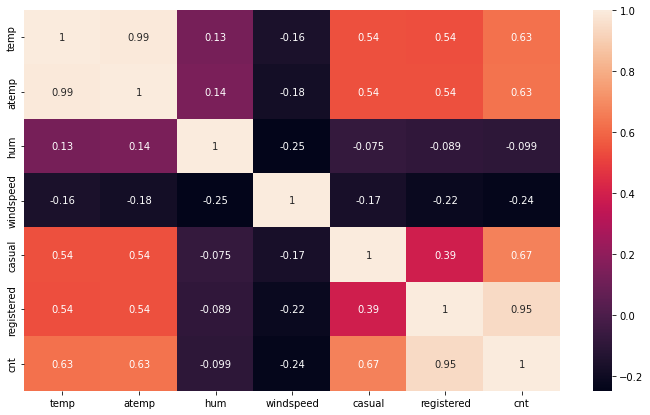

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True);

In [11]:
data.drop(['dteday','yr','atemp','casual','registered'],axis=1,inplace=True)

In [12]:
data=pd.get_dummies(data)

In [13]:
data.head(3)

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_10,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
3,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0


In [14]:
X=data.copy()

In [15]:
df_train, df_test = train_test_split(X, train_size=0.7)
print('Size of training dataset: ', df_train.shape)
print('Size of test dataset: ', df_test.shape)
X_train = df_train.drop(columns='cnt', axis =1)
y_train = df_train['cnt']
X_test = df_test.drop(columns='cnt', axis =1)
y_test = df_test['cnt']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Size of training dataset:  (510, 34)
Size of test dataset:  (220, 34)


((510, 33), (510,), (220, 33), (220,))

In [50]:
dtm = DecisionTreeRegressor(min_samples_split=10,max_leaf_nodes=20)
dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))
dtm.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.5986115002494892
R-Squared on test dataset=0.7982502262095561


In [51]:
dtm.feature_importances_

array([0.72756116, 0.13185232, 0.06608103, 0.01568286, 0.00847458,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01987664, 0.02148536,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00898606, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [52]:
for i,j in enumerate(dtm.feature_importances_):
  print('Feature: %0d, Score: %.4f' % (i,j))

Feature: 0, Score: 0.7276
Feature: 1, Score: 0.1319
Feature: 2, Score: 0.0661
Feature: 3, Score: 0.0157
Feature: 4, Score: 0.0085
Feature: 5, Score: 0.0000
Feature: 6, Score: 0.0000
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0000
Feature: 9, Score: 0.0000
Feature: 10, Score: 0.0000
Feature: 11, Score: 0.0000
Feature: 12, Score: 0.0000
Feature: 13, Score: 0.0000
Feature: 14, Score: 0.0000
Feature: 15, Score: 0.0000
Feature: 16, Score: 0.0000
Feature: 17, Score: 0.0000
Feature: 18, Score: 0.0199
Feature: 19, Score: 0.0215
Feature: 20, Score: 0.0000
Feature: 21, Score: 0.0000
Feature: 22, Score: 0.0000
Feature: 23, Score: 0.0000
Feature: 24, Score: 0.0000
Feature: 25, Score: 0.0090
Feature: 26, Score: 0.0000
Feature: 27, Score: 0.0000
Feature: 28, Score: 0.0000
Feature: 29, Score: 0.0000
Feature: 30, Score: 0.0000
Feature: 31, Score: 0.0000
Feature: 32, Score: 0.0000


In [53]:
X_train.columns[:5]

Index(['temp', 'hum', 'windspeed', 'season_1', 'season_2'], dtype='object')